In [248]:
# AI professionals with a special focus on recommender system development to build a 
# robust intelligent model capable of recommending 
# products and services to Users based on their activities on sapa.com

# Your team lead has assigned you to the building of a model capable of predicting users’
# responses to marketing campaigns based on the features in the provided dataset by the sapa.com data engineer.

## **Import the necessary libraries** ##

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle 

## Load the data and Understanding

In [254]:
# load the data into dataframe
df= pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [256]:
df.shape

(1568, 27)

In [257]:
pd.set_option("display.max_column", None)

In [258]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [259]:
df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [260]:
# dropping ID column as its not needed for modelling
df = df.drop(columns = ["ID"])
df = df.drop(columns = ["Date_Customer"])

test_df_ID_column = test_df["ID"]
test_df = test_df.drop(columns = ["ID"])
test_df = test_df.drop(columns = ["Date_Customer"])


In [261]:
df

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,Graduation,Divorced,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,1958,Graduation,Together,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,1962,Graduation,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,1979,2n Cycle,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,1959,Graduation,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,Graduation,Married,52893.6,1,1,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0
1564,1980,Graduation,Single,74190.0,0,1,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0
1565,1952,Master,Married,80857.2,0,1,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0
1566,1964,PhD,Single,58701.6,1,1,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0


In [262]:
# print the unique values in each column one by one example

print(df["Education_Level"].unique())

print(test_df["Education_Level"].unique())

['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
['Graduation' 'Basic' 'Master' '2n Cycle' 'PhD']


In [263]:
# we need to find out which columns is categorical (split into various categories) or numerical column
# so we need to print unique values in all columns

for col in df.columns:
    print(col, df[col].unique())
    print("-"*50)

Year_of_Birth [1955 1958 1962 1979 1959 1960 1953 1974 1966 1975 1989 1956 1976 1970
 1965 1977 1952 1981 1951 1995 1973 1972 1971 1988 1984 1990 1986 1969
 1900 1967 1987 1992 1968 1963 1957 1944 1961 1950 1954 1982 1991 1947
 1985 1978 1980 1964 1983 1949 1993 1948 1994 1946 1942 1945 1996 1997]
--------------------------------------------------
Education_Level ['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
--------------------------------------------------
Marital_Status ['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']
--------------------------------------------------
Disposable_Income [ 77504.4  56784.  103714.8 ...  52893.6  80857.2  27873.6]
--------------------------------------------------
No_of_Kids_in_home [1 0 2]
--------------------------------------------------
No_of_Teen_in_home [1 0 2]
--------------------------------------------------
Recency [ 56  17  49  59  32  94  61  13  88  57 102  47  14  37  91  72 100  28
  80  77  64  10  97  62  3

In [264]:
# from the data, the only categorical columns are 
# Education_Level ['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
# --------------------------------------------------
# Marital_Status ['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']
# --------------------------------------------------
# Disposable_Income [ 77504.4  56784.  103714.8 ...  52893.6  80857.2  27873.6]
# --------------------------------------------------
# No_of_Kids_in_home [1 0 2]
# --------------------------------------------------
# No_of_Teen_in_home [1 0 2] 
# ----------------------------------
# Cmp3Accepted [0 1]
# --------------------------------------------------
# Cmp4Accepted [0 1]
# --------------------------------------------------
# Cmp5Accepted [0 1]
# --------------------------------------------------
# Cmp1Accepted [0 1]
# --------------------------------------------------
# Cmp2Accepted [0 1]
# --------------------------------------------------
# Any_Complain [0 1]
# --------------------------------------------------
# Response [0 1]

In [265]:
# I want to convert the Year_of_Birth to date type because its currently string

# df["Date_Customer"] = pd.to_datetime(df["Date_Customer"])

In [266]:
# I want to save the data for both numerical and catgorical into separate variables

numerical_features_list = ["Year_of_Birth", "Disposable_Income", "Recency", "Discounted_Purchases", "WebPurchases", "CatalogPurchases", "StorePurchases", "Amount_on_Wines", "Amount_on_Fruits",  "Amount_on_MeatProducts", "Amount_on_FishProducts", "Amount_on_SweetProducts", "Amount_on_GoldProds", "WebVisitsMonth"]

test_numerical_features_list = ["Year_of_Birth", "Disposable_Income", "Recency", "Discounted_Purchases", "WebPurchases", "CatalogPurchases", "StorePurchases", "Amount_on_Wines", "Amount_on_Fruits",  "Amount_on_MeatProducts", "Amount_on_FishProducts", "Amount_on_SweetProducts", "Amount_on_GoldProds", "WebVisitsMonth"]
# now we are printing only the catrgorical features

for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("-"*50)

Education_Level ['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
--------------------------------------------------
Marital_Status ['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']
--------------------------------------------------
No_of_Kids_in_home [1 0 2]
--------------------------------------------------
No_of_Teen_in_home [1 0 2]
--------------------------------------------------
Cmp3Accepted [0 1]
--------------------------------------------------
Cmp4Accepted [0 1]
--------------------------------------------------
Cmp5Accepted [0 1]
--------------------------------------------------
Cmp1Accepted [0 1]
--------------------------------------------------
Cmp2Accepted [0 1]
--------------------------------------------------
Any_Complain [0 1]
--------------------------------------------------
Response [0 1]
--------------------------------------------------


In [267]:
df.isnull().sum()

Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   object 
 2   Marital_Status           1568 non-null   object 
 3   Disposable_Income        1552 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Recency                  1568 non-null   int64  
 7   Discounted_Purchases     1568 non-null   int64  
 8   WebPurchases             1568 non-null   int64  
 9   CatalogPurchases         1568 non-null   int64  
 10  StorePurchases           1568 non-null   int64  
 11  Amount_on_Wines          1568 non-null   int64  
 12  Amount_on_Fruits         1568 non-null   int64  
 13  Amount_on_MeatProducts   1568 non-null   int64  
 14  Amount_on_FishProducts  

In [269]:
test_df.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [270]:
# Confirming if the only float is truly a float

df["Disposable_Income"].isnull().sum()

16

In [271]:
# So before I can replace the missing values, I need to check the data whether its skewed or not. If its skewed, I'll replace the missing values with
# Skewness ≈ 0 → roughly normal → ✅ use mean
# Skewness > +1 or < -1 → highly skewed → ⚠️ use median
# Between ±0.5 → usually safe to use mean

skewness = df['Disposable_Income'].skew()
print(f"Skewness: {skewness}")

Skewness: 8.040484602894402


In [272]:
# This shows the data is extrememly right skewed, so we'd have to use median

df["Disposable_Income"] = df["Disposable_Income"].fillna(df['Disposable_Income'].median())

In [273]:
df["Disposable_Income"].isnull().sum()

0

In [274]:
# Now I can confirm whether everything is really float in that column

df["Disposable_Income"] = df["Disposable_Income"].astype(float)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   object 
 2   Marital_Status           1568 non-null   object 
 3   Disposable_Income        1568 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Recency                  1568 non-null   int64  
 7   Discounted_Purchases     1568 non-null   int64  
 8   WebPurchases             1568 non-null   int64  
 9   CatalogPurchases         1568 non-null   int64  
 10  StorePurchases           1568 non-null   int64  
 11  Amount_on_Wines          1568 non-null   int64  
 12  Amount_on_Fruits         1568 non-null   int64  
 13  Amount_on_MeatProducts   1568 non-null   int64  
 14  Amount_on_FishProducts  

In [276]:
# Understand the distrubution of the target class/colum, whether its balanced or not

df["Response"].value_counts()

Response
0    1329
1     239
Name: count, dtype: int64

## Insights so far

1. There is clear imbalance in the dataset in the target column (using oversampling, to increase the minority class or undersampling, to reduce the major class)
2. We have removed the ID because its not relevant
3. We have removed all missing values
4. We have confirmed there's no missing values or wrong type in each column
5. Missing values in Displosable_income was removed and replaced with median because the data in the column is highly right skewed


# EDA

In [279]:

df.columns

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [280]:
# This only works on the numerical data type

df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62366.727551,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,31925.242304,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41801.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81055.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Numerical features analysis

1. Understand the distribution of the numerical features

In [282]:
def plot_hist (df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    
    # Calculate mean and median for each column
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    # add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="dashed", label="Mean")
    plt.axvline(col_median, color="green", linestyle="dashed", label="Median")
    plt.legend()
    plt.show()

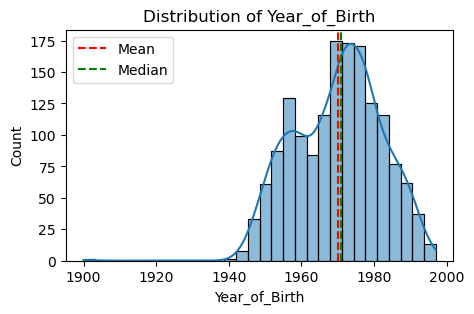

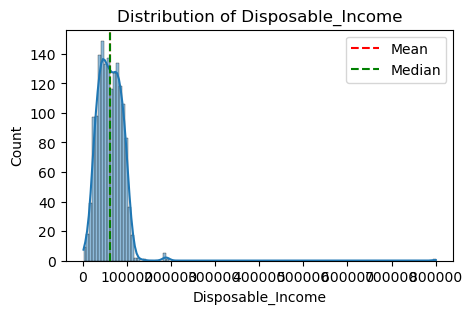

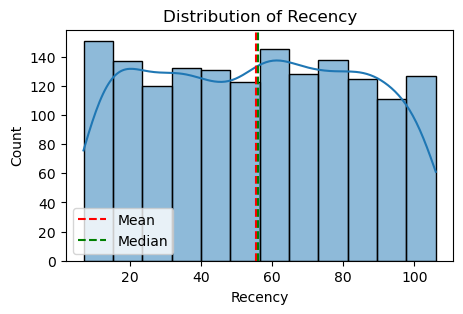

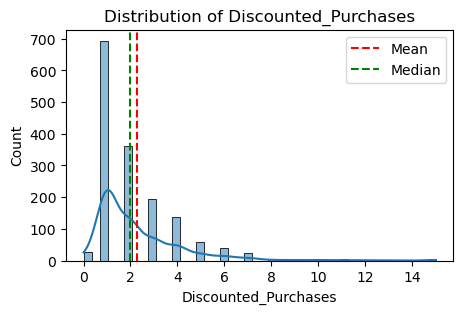

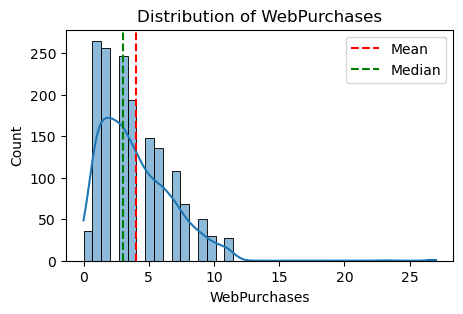

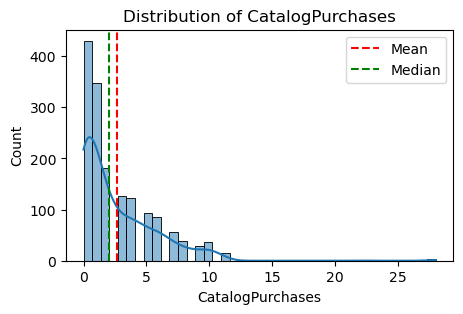

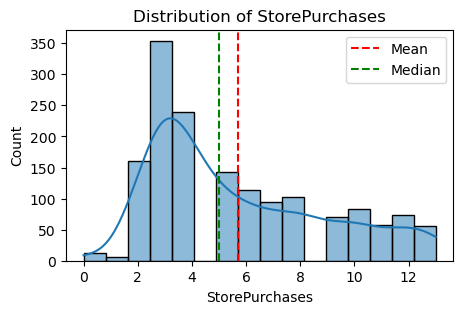

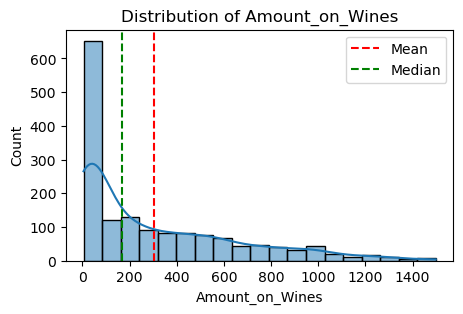

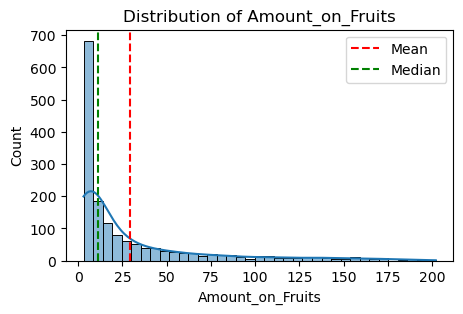

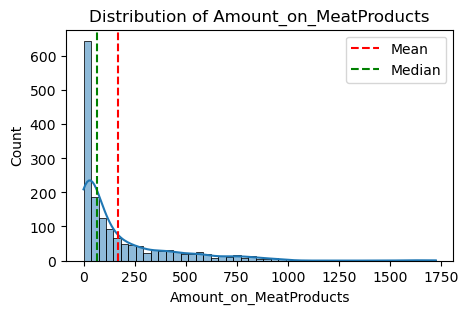

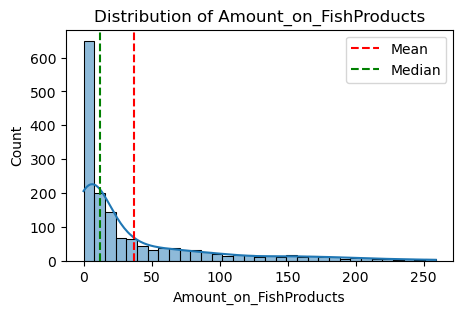

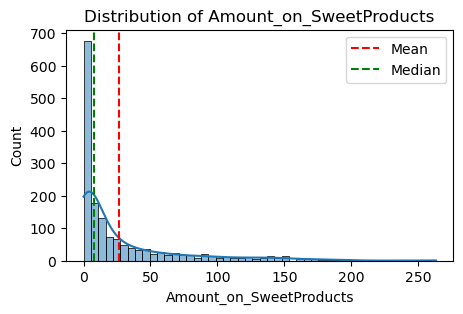

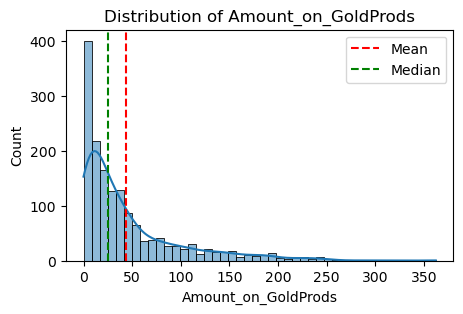

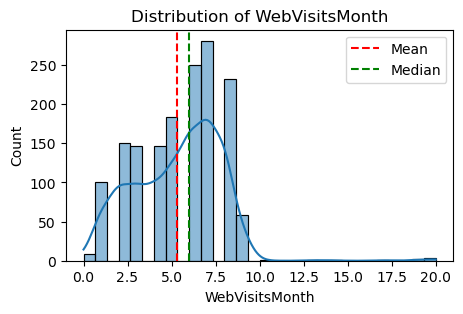

In [283]:
# If its right skewed, i.e tail on the right then there are chances that outlier might be present
# For classification, svm model problem, you cant have skewed distribution, you need to have a bell by scaling the features

for col in df:
    if col in numerical_features_list:
        plot_hist (df, col)

# Box Plot for numerical data

In [285]:
# Now we need a box plot to identify the outliers

def plot_box_plot (df, column_name):
    plt.figure(figsize=(5, 3))
    sns.boxplot(df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(df[column_name])
    plt.show()

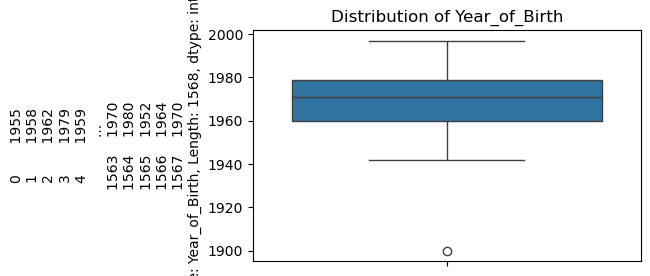

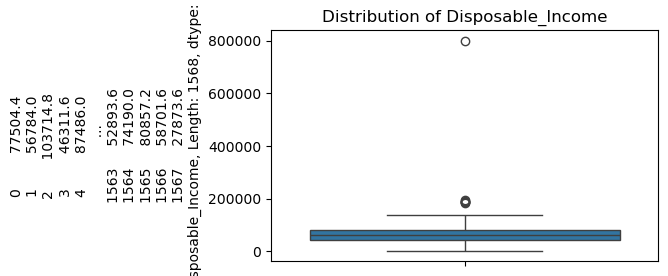

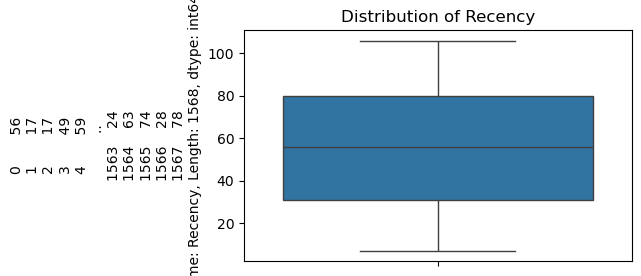

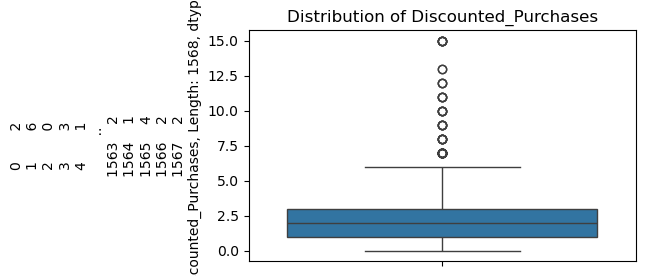

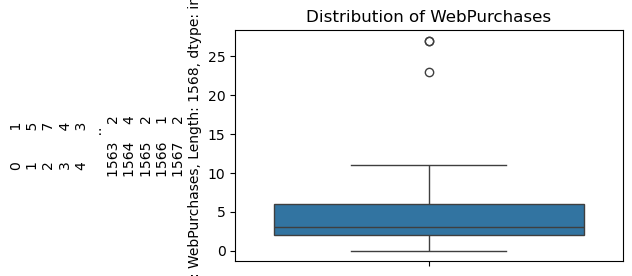

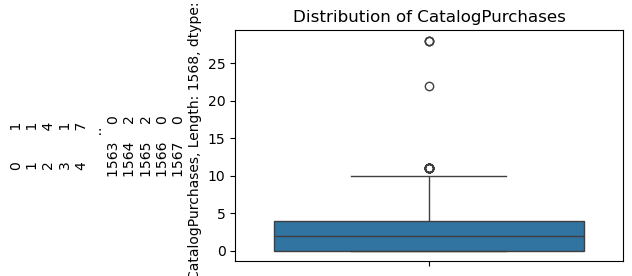

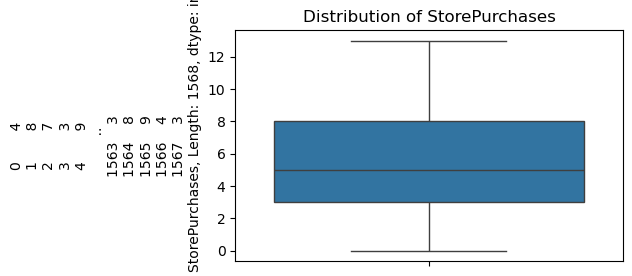

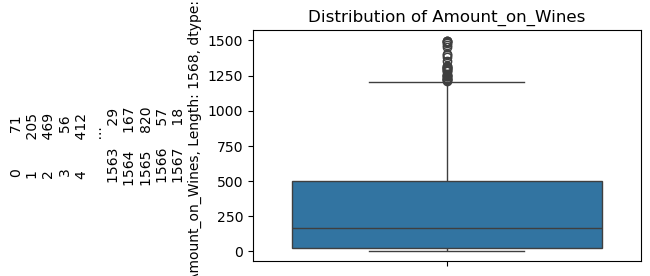

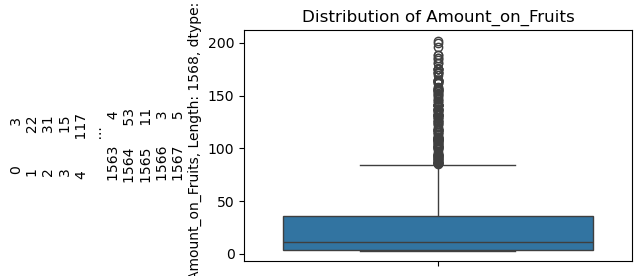

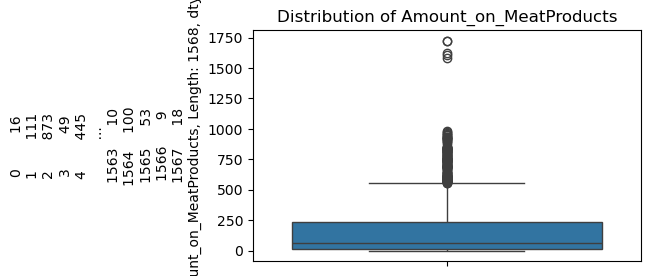

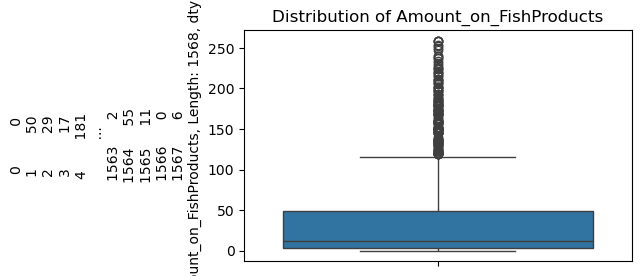

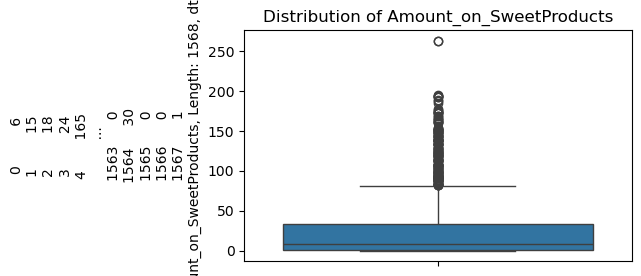

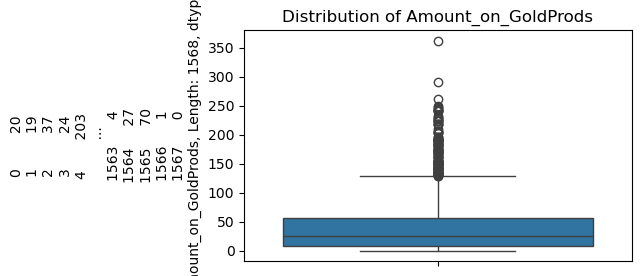

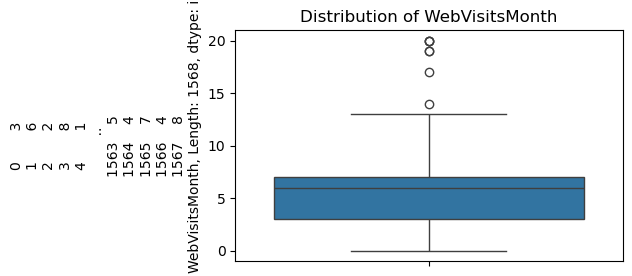

In [288]:
for col in df:
    if col in numerical_features_list:
        plot_box_plot (df, col)

## Correlation heatmap for numerical features 

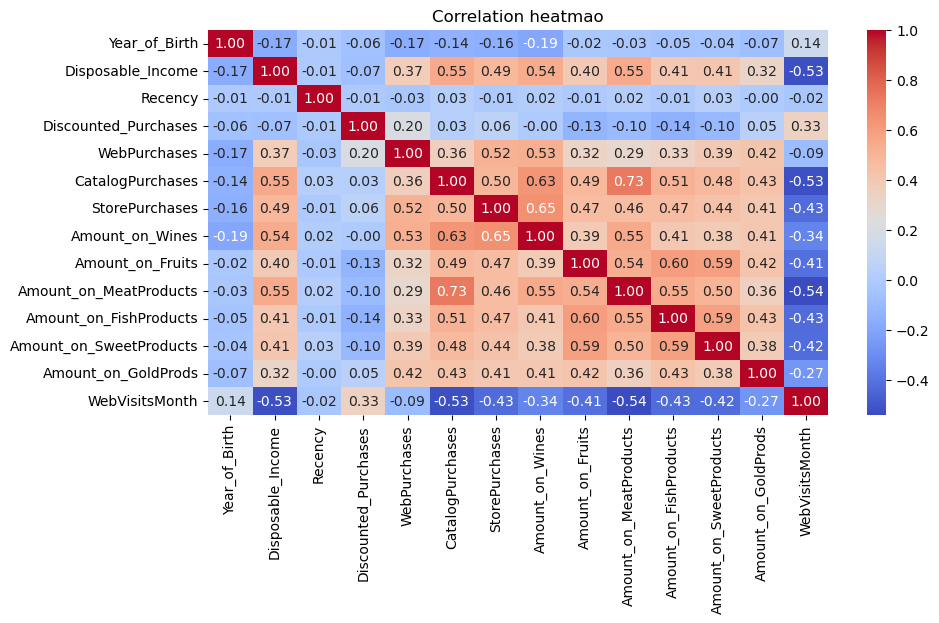

In [290]:
plt.figure(figsize = (10, 5))
sns.heatmap(df[numerical_features_list].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmao")
plt.show()

In [291]:
# if 2 columns are 1.0, we drop or ignore if its not the target itself
# if there's 2 columns thats highly correlated i.e greater than 0.8, we drop one of them and test with our model. Test by adding or removing the columns




# Categorical features Analysis

In [293]:
categorical_df = pd.DataFrame()

for col in df.columns:
    if col not in numerical_features_list:
        categorical_df[col] = df[col]

In [295]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Education_Level     1568 non-null   object
 1   Marital_Status      1568 non-null   object
 2   No_of_Kids_in_home  1568 non-null   int64 
 3   No_of_Teen_in_home  1568 non-null   int64 
 4   Cmp3Accepted        1568 non-null   int64 
 5   Cmp4Accepted        1568 non-null   int64 
 6   Cmp5Accepted        1568 non-null   int64 
 7   Cmp1Accepted        1568 non-null   int64 
 8   Cmp2Accepted        1568 non-null   int64 
 9   Any_Complain        1568 non-null   int64 
 10  Response            1568 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 134.9+ KB


## Count plot for catgeorical columns

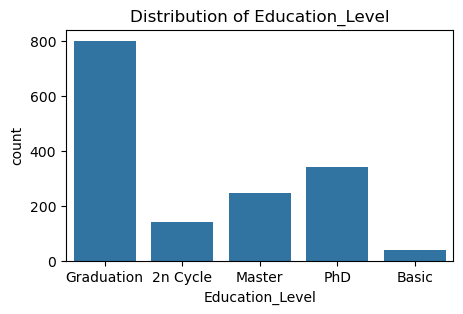

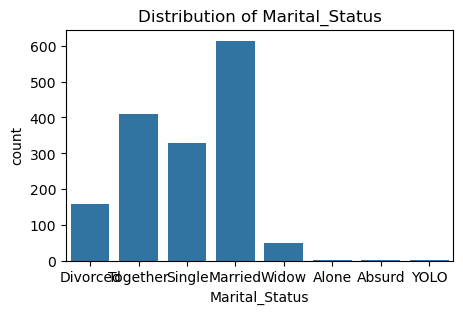

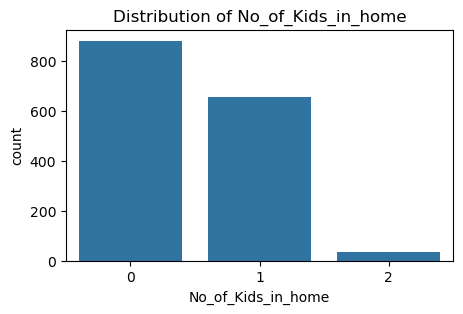

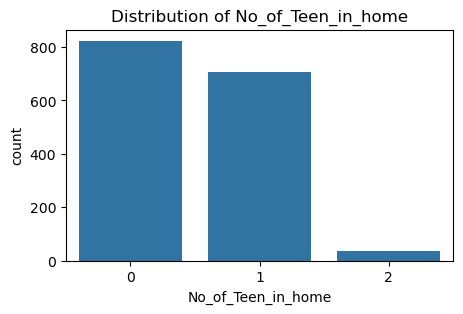

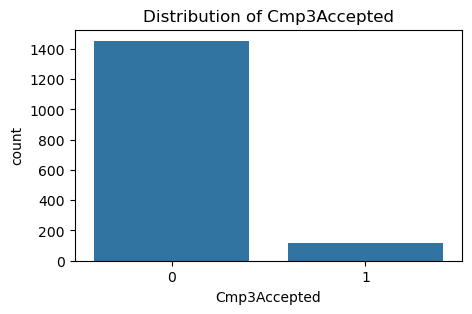

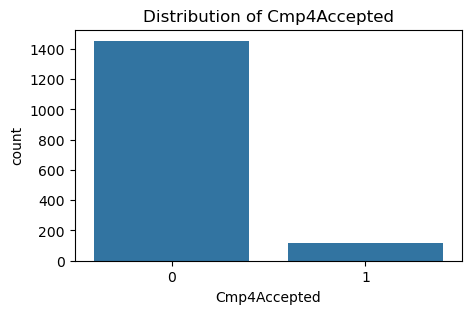

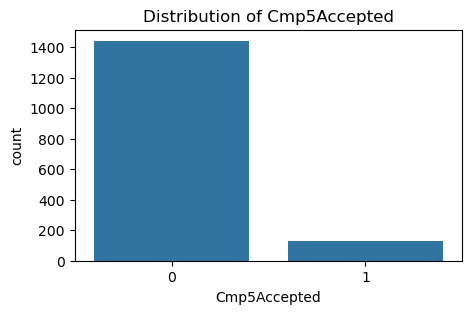

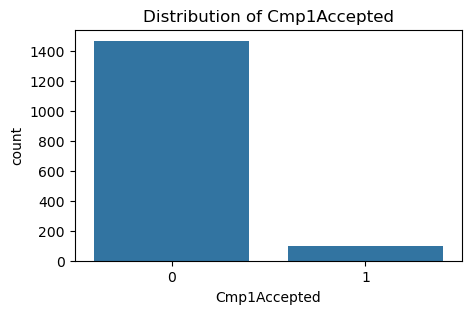

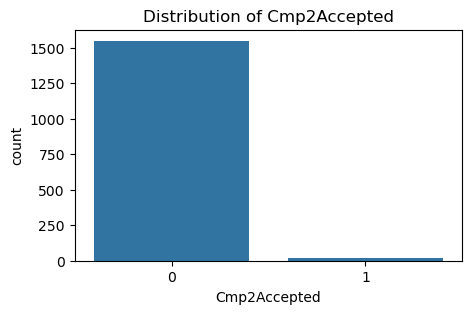

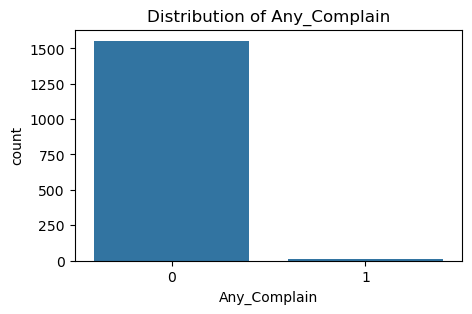

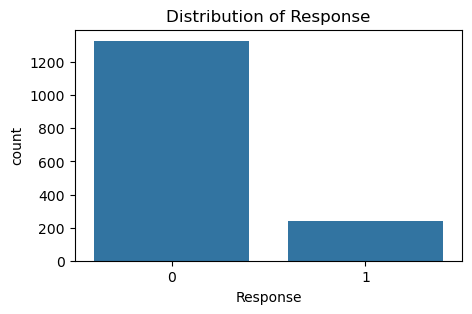

In [297]:
for col in categorical_df:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

# Preprocessing

In [299]:
df.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,Graduation,Divorced,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,1958,Graduation,Together,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,1962,Graduation,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,1979,2n Cycle,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,1959,Graduation,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


## Label Encoding of the other categorical features

In [304]:
# Identify columns with object data types

object_colums = categorical_df.select_dtypes(include="object").columns
print(object_colums)

Index(['Education_Level', 'Marital_Status'], dtype='object')


In [306]:
# Initialize a dictionary to save the encoders, so we want to always use this encoders to encode categorical values regardless of data passed in

encoders = {}

# apply label encoder and store the encoders

for column in object_colums:
    label_encoder =  LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# save the encoders
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [307]:
encoders

{'Education_Level': LabelEncoder(), 'Marital_Status': LabelEncoder()}

In [308]:
df.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,2,2,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,1958,2,5,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,1962,2,4,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,1979,0,4,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,1959,2,3,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


## Handle Imbalance in the target class
1. Perform train test split before treating imbalance by smote

In [313]:

X = df.drop(columns = ["Response"])
y = df["Response"]

In [314]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   int32  
 2   Marital_Status           1568 non-null   int32  
 3   Disposable_Income        1568 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Recency                  1568 non-null   int64  
 7   Discounted_Purchases     1568 non-null   int64  
 8   WebPurchases             1568 non-null   int64  
 9   CatalogPurchases         1568 non-null   int64  
 10  StorePurchases           1568 non-null   int64  
 11  Amount_on_Wines          1568 non-null   int64  
 12  Amount_on_Fruits         1568 non-null   int64  
 13  Amount_on_MeatProducts   1568 non-null   int64  
 14  Amount_on_FishProducts  

In [316]:
# Implement standard scaling to the numerical with object if i am using another model thats not tree based model


In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [318]:
print(y_train.value_counts())

Response
0    1057
1     197
Name: count, dtype: int64


In [322]:
# Now were going to treat the imbalance using SMOTE, using iversampling

smote = SMOTE(random_state=42)

In [323]:
# This is only done on train data

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) 

# to get uniform data

In [324]:
print(y_train_smote.value_counts())

Response
0    1057
1    1057
Name: count, dtype: int64


# Model Training

In [329]:
# Do hyper parameter tuning


In [332]:
# Training with default hyperparemeter

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [333]:
# Performing cross validation to get accuracry of each of the models


# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.86
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.92
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.92
----------------------------------------------------------------------


In [334]:
cv_scores

{'Decision Tree': array([0.81323877, 0.85579196, 0.88652482, 0.88888889, 0.86255924]),
 'Random Forest': array([0.89125296, 0.91962175, 0.92671395, 0.95035461, 0.90995261]),
 'XGBoost': array([0.86761229, 0.93144208, 0.93380615, 0.94326241, 0.92654028])}

### RandomForest and XGBoost gives the same accuracy but we'll go with random forest

In [338]:
# Train a random forest classifier so we can save the model

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [339]:
print(y_test.value_counts())

Response
0    272
1     42
Name: count, dtype: int64


# Model Evaluation

In [341]:
# Evaluate the model on test data without smote

y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.8789808917197452
Confusion Matrix:
 [[252  20]
 [ 18  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       272
           1       0.55      0.57      0.56        42

    accuracy                           0.88       314
   macro avg       0.74      0.75      0.74       314
weighted avg       0.88      0.88      0.88       314



In [342]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_response_prediction.pkl", "wb") as f:
  pickle.dump(model_data, f)

# Load the saved model and build a Predictive System

In [344]:
# load the saved model and the feature names

with open("customer_response_prediction.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [345]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [346]:
print(feature_names)

['Year_of_Birth', 'Education_Level', 'Marital_Status', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain']


In [347]:
# Test with the Test Data given

In [351]:
input_data_df = pd.read_csv("Train.csv")
input_data_df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [353]:
with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)



In [354]:
# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  test_df[column] = encoder.transform(test_df[column])


In [355]:
# make a prediction
prediction = loaded_model.predict(test_df)
pred_prob = loaded_model.predict_proba(test_df)

print(prediction)

# results
print(f"Prediction: {'Respose' if prediction[0] == 1 else 'No Response'}")
print(f"Prediciton Probability: {pred_prob}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

In [411]:
# submission = pd.DataFrame()
# submission["ID"] = test_df_ID_column  # Assign ID
# submission["Response"] =  prediction # Assign predictions

# pd.DataFrame(submission, columns=["ID","Response"]).to_csv('First_Iteration2.csv')

In [417]:
test = pd.read_csv('Test.csv')

final_submission = test['ID']

final_submission['Response'] = prediction

final_submission.to_csv('submission.csv', index=False)


C:\Users\Loveth\AppData\Local\Temp\ipykernel_4716\3623447050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submission['Response'] = prediction
